<img src='Drug_usability.jpg' 
style='height:400px'>

<div class="list-group" id="list-tab" role="tablist">
  <h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">&nbsp;Summary:</h1>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile">1. Introduction<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages">2. EDA <span class="badge badge-primary badge-pill">2</span></a>
   <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="messages">3. Dataset manipulation <span class="badge badge-primary badge-pill">3</span></a>
   <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="messages">4. Pre-processing <span class="badge badge-primary badge-pill">4</span></a>    <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="messages">5.Sentiment Analysis <span class="badge badge-primary badge-pill">5</span></a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab" aria-controls="messages">6. Modelling<span class="badge badge-primary badge-pill">6</span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="messages">7. Conclusion<span class="badge badge-primary badge-pill">7</span></a>
</div>

<a id="1"></a> <br>
<font size="+3" color="black"><b>1 - Introduction</b></font><br><a id="1"></a>
<br> 

* Online reviews not only provide an extremely efficient way to market products, but it also provides legitimacy and valuable information on the product.

* By being able to predict the health condition of a patient from their drug review, we will be able to provide a more detailed review on drugs. This will bring forth a more accurate feedback on reviews which will inevitably help consumers make a more informed decision.

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import plotly.graph_objs as go
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold

In [2]:
#Reading both data files
data1=pd.read_csv('drugLibTest_raw.tsv',header=0, delimiter="\t")
data2=pd.read_csv('drugLibTrain_raw.tsv',header=0, delimiter="\t")

In [3]:
#Combining the data files
data = pd.concat([data1, data2]).reset_index(drop = True)
data.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4143 entries, 0 to 4142
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4143 non-null   int64 
 1   urlDrugName        4143 non-null   object
 2   rating             4143 non-null   int64 
 3   effectiveness      4143 non-null   object
 4   sideEffects        4143 non-null   object
 5   condition          4142 non-null   object
 6   benefitsReview     4143 non-null   object
 7   sideEffectsReview  4141 non-null   object
 8   commentsReview     4135 non-null   object
dtypes: int64(2), object(7)
memory usage: 291.4+ KB


In [5]:
data=data.dropna()

<a id="1"></a> <br>
<font size="+3" color="black"><b>2 - EDA</b></font><br><a id="2"></a>
<br> 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4132 entries, 0 to 4142
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4132 non-null   int64 
 1   urlDrugName        4132 non-null   object
 2   rating             4132 non-null   int64 
 3   effectiveness      4132 non-null   object
 4   sideEffects        4132 non-null   object
 5   condition          4132 non-null   object
 6   benefitsReview     4132 non-null   object
 7   sideEffectsReview  4132 non-null   object
 8   commentsReview     4132 non-null   object
dtypes: int64(2), object(7)
memory usage: 322.8+ KB


In [7]:
data['condition'].nunique()

1804

In [8]:
data['condition'].value_counts().head(30).sum()

1521

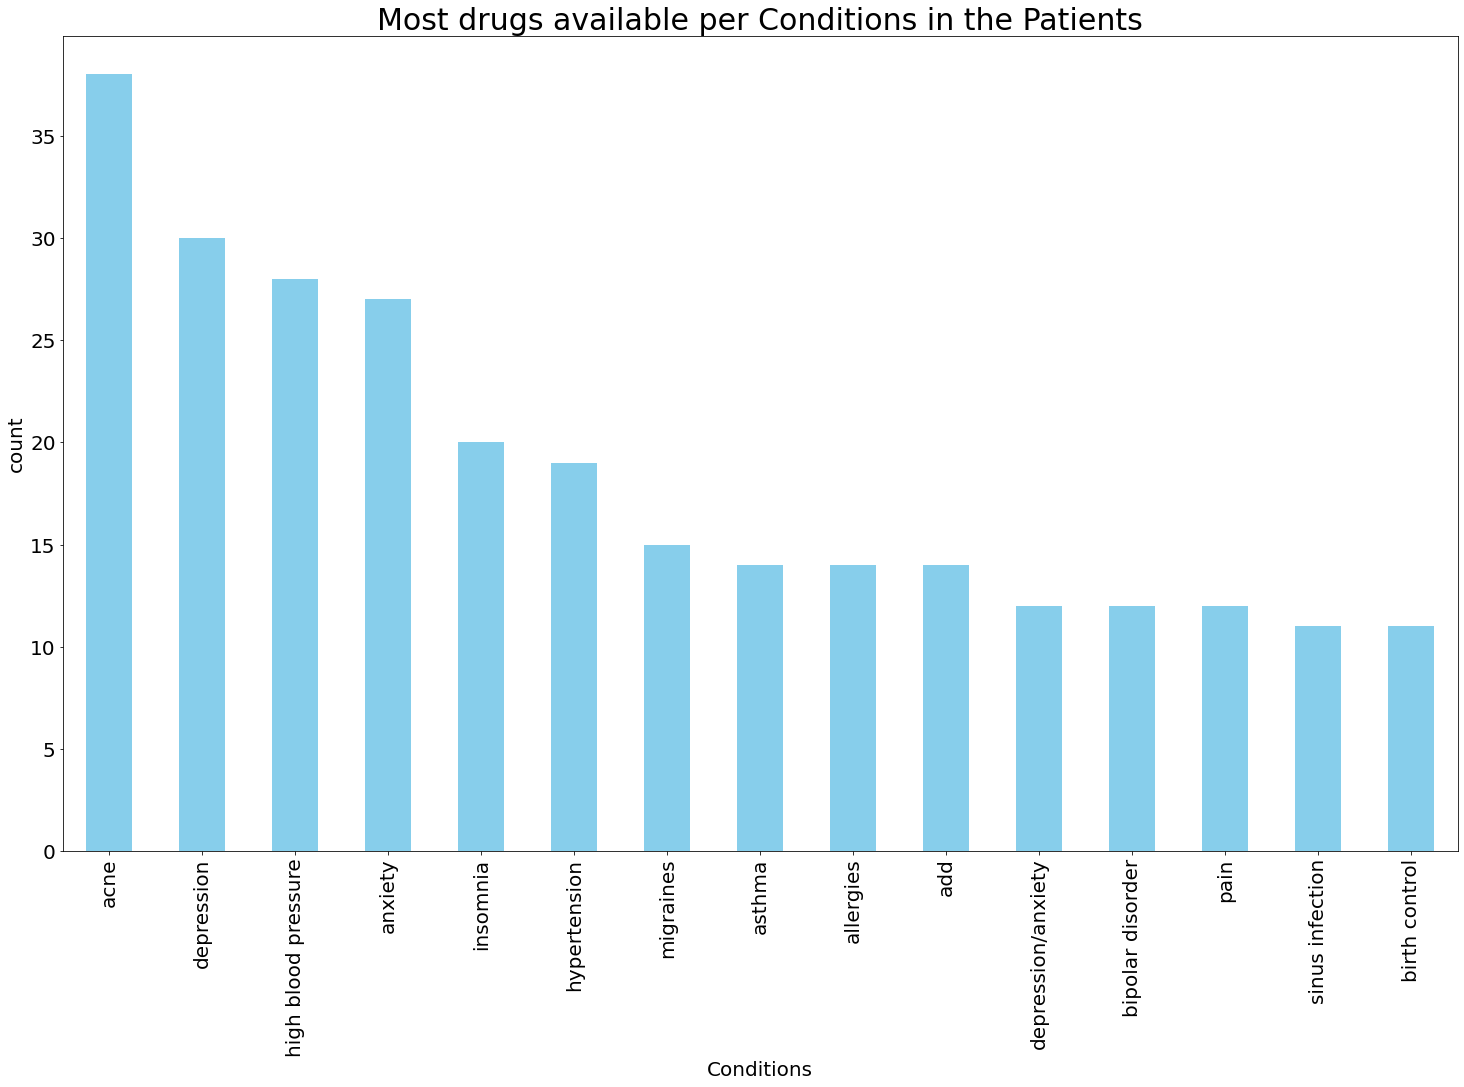

In [9]:
data.groupby(['condition'])['urlDrugName'].nunique().sort_values(ascending = False).head(15).plot.bar(figsize = (25, 15), color = 'skyblue')
plt.title('Most drugs available per Conditions in the Patients', fontsize = 30)
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count',fontsize = 20)
plt.show()

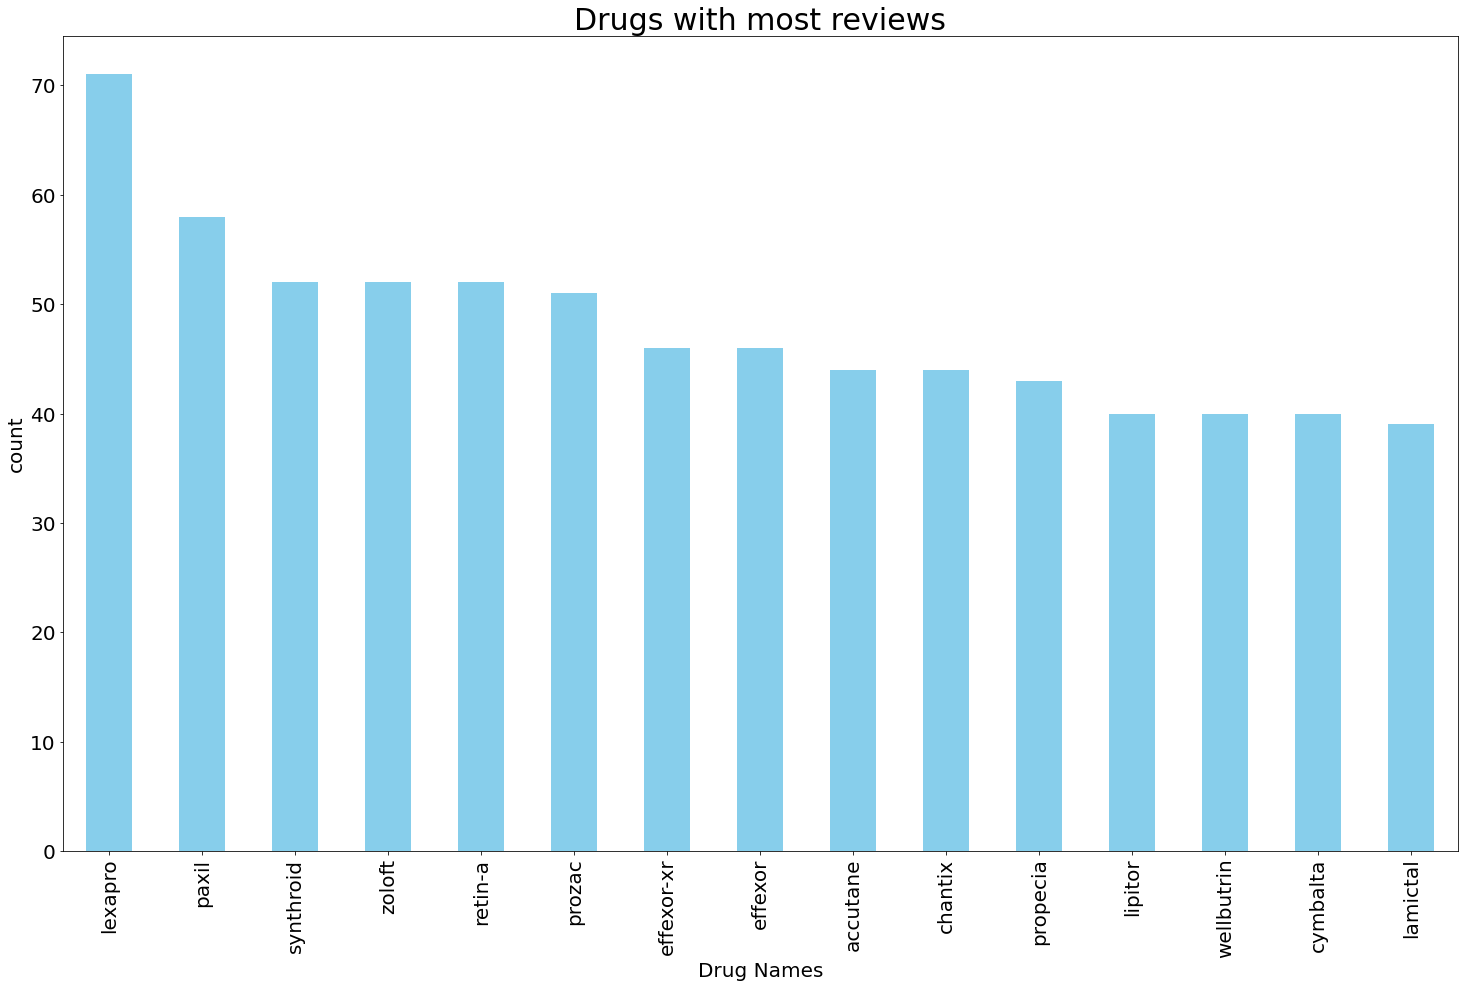

In [10]:
data.groupby(['urlDrugName'])['commentsReview'].nunique().sort_values(ascending = False).head(15).plot.bar(figsize = (25, 15), color = 'skyblue')
plt.title('Drugs with most reviews', fontsize = 30)
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)
plt.xlabel('Drug Names', fontsize = 20)
plt.ylabel('count',fontsize = 20)
plt.show()

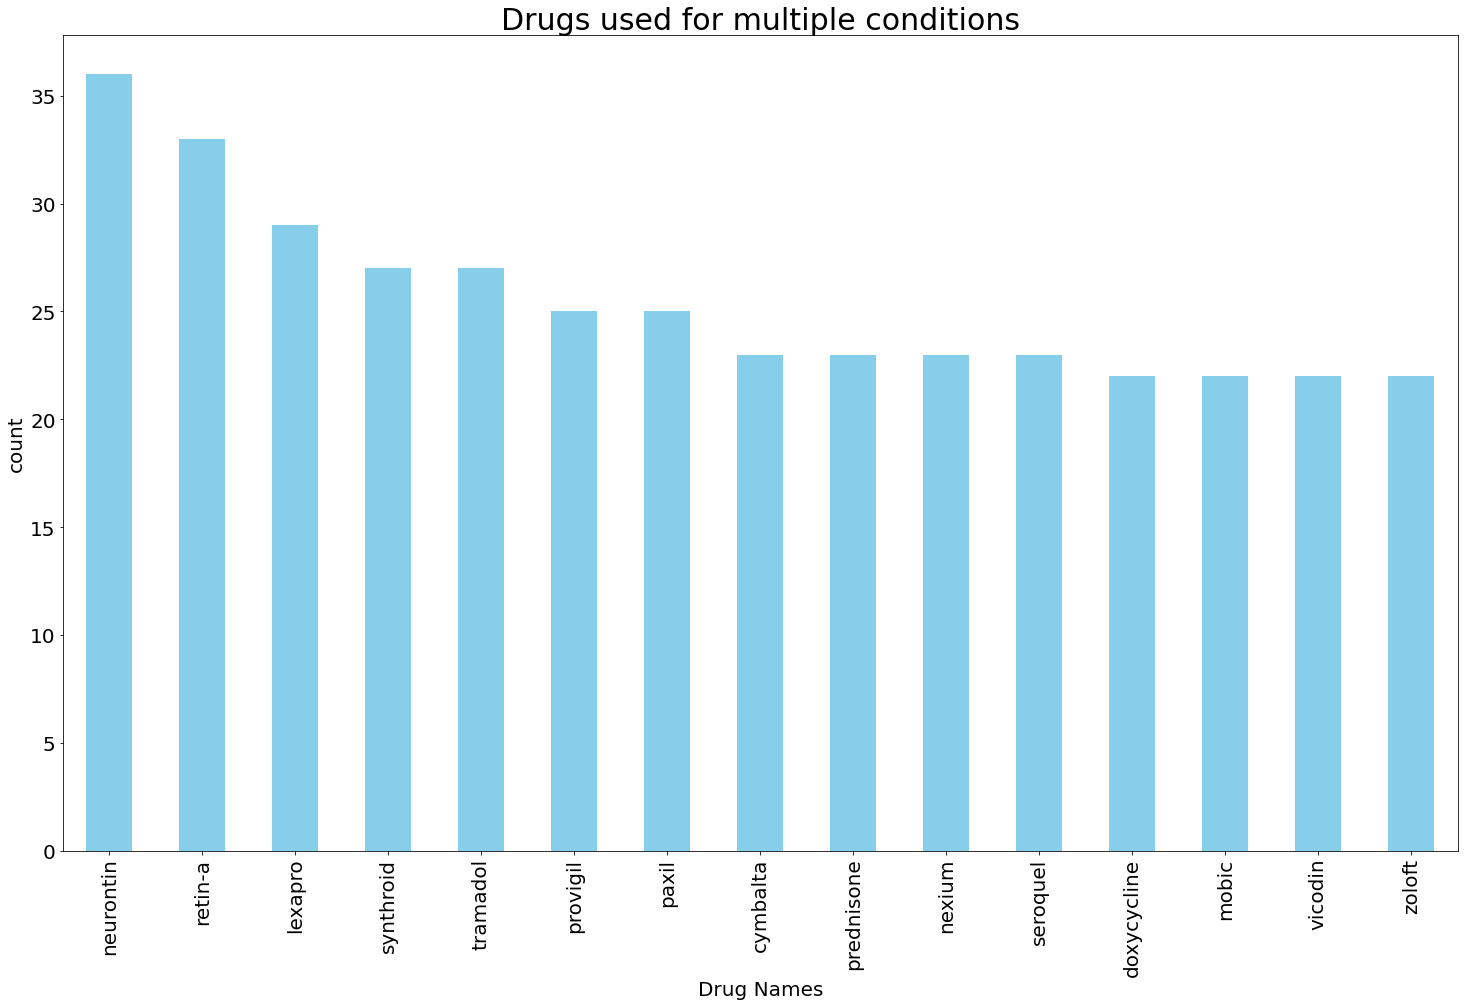

In [11]:
data.groupby(['urlDrugName'])['condition'].nunique().sort_values(ascending = False).head(15).plot.bar(figsize = (25, 15), color = 'skyblue')
plt.title('Drugs used for multiple conditions', fontsize = 30)
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)
plt.xlabel('Drug Names', fontsize = 20)
plt.ylabel('count',fontsize = 20)
plt.show()

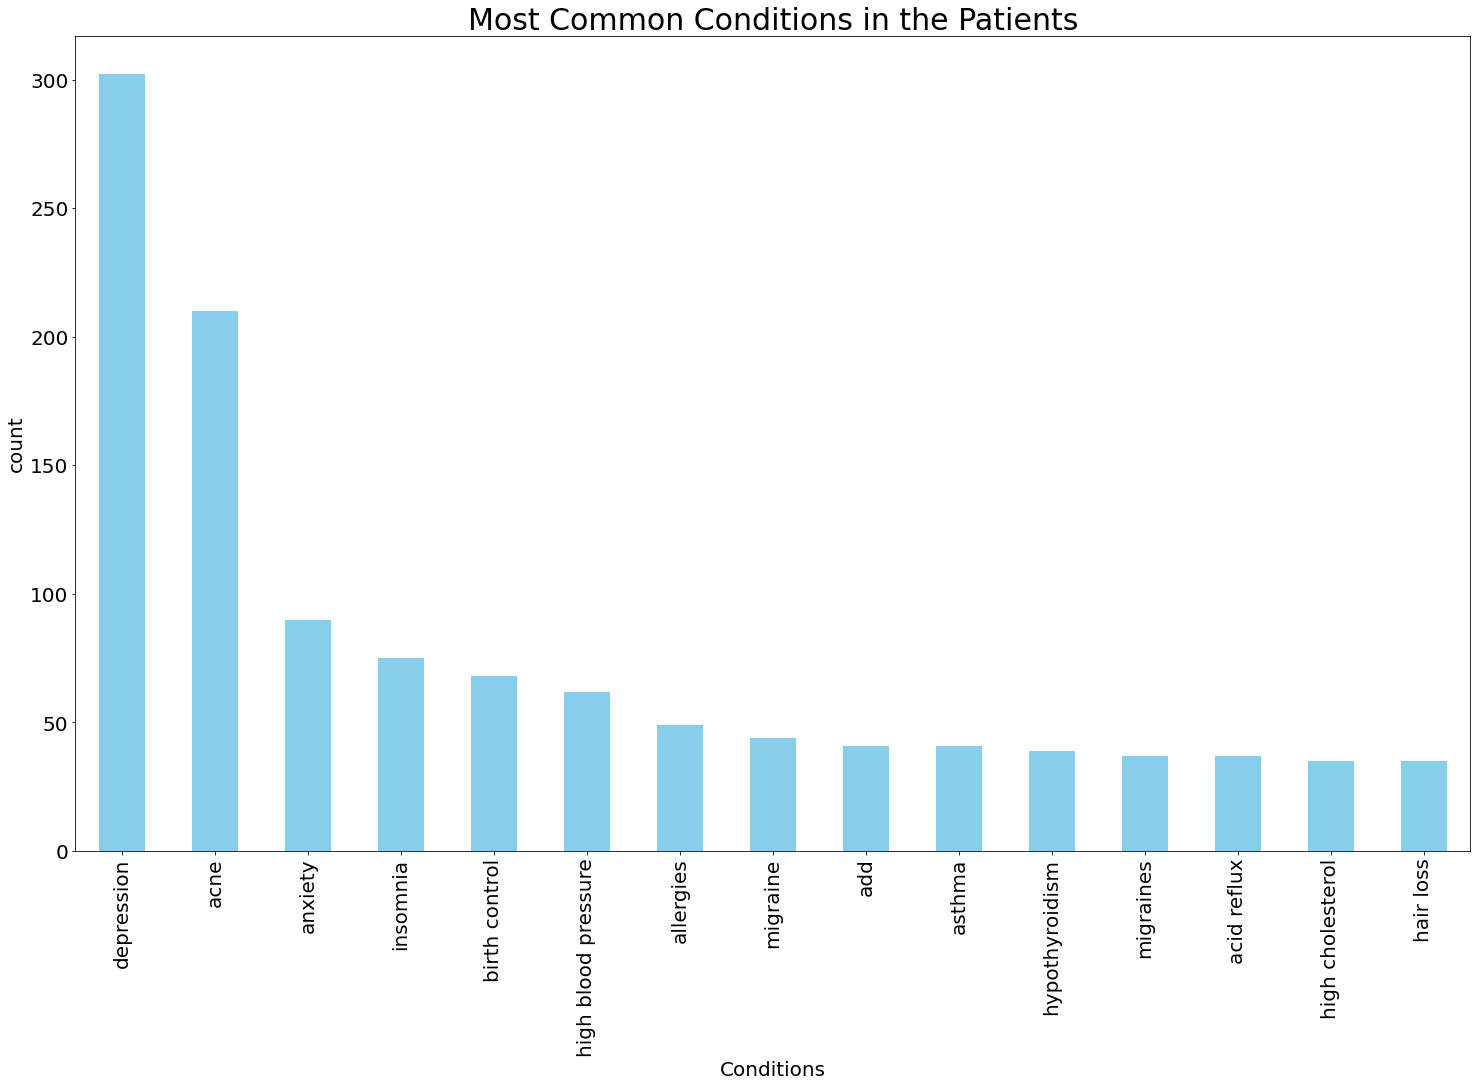

In [12]:
data['condition'].value_counts().head(15).plot.bar(figsize = (25, 15), color = 'skyblue')
plt.title('Most Common Conditions in the Patients', fontsize = 30)
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count',fontsize = 20)
plt.show()

In [13]:
data['rating'].value_counts()


10    967
8     745
9     612
7     471
1     419
5     226
6     214
3     194
4     149
2     135
Name: rating, dtype: int64

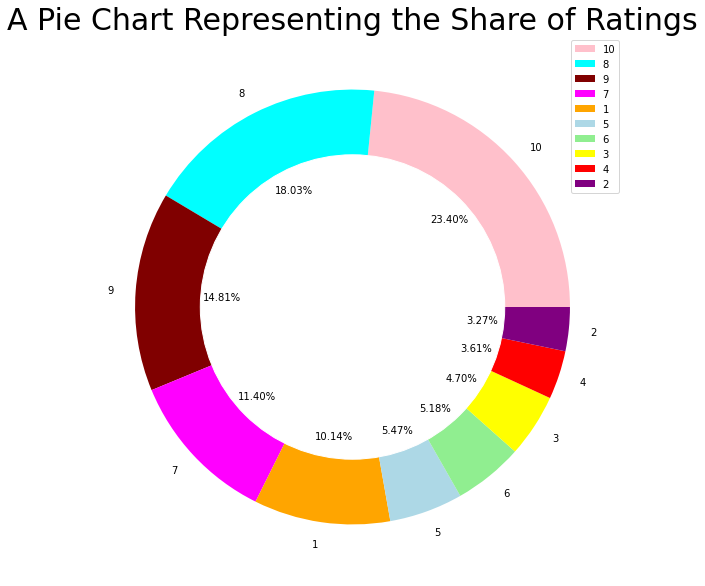

In [14]:
size = [967,745,612,471,419,226,214,194,149,135]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'lightblue', 'lightgreen', 'yellow','red','purple']
labels = "10", "8", "9", "7", "1", "5", "6", "3","4","2"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Share of Ratings', fontsize = 30)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [15]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [19]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(data.benefitsReview,10,3)
most_common_uni = dict(most_common_uni)
fig = px.bar(x = list(most_common_uni.values()), y = list(most_common_uni.keys()), labels=dict(x="Count", y="Words"))
fig.update_traces(marker_color='#FF8500')
fig.update_layout(title_text='Trigram for Benefits', paper_bgcolor = 'white', plot_bgcolor = 'white')
fig.show()

<Figure size 1152x648 with 0 Axes>

In [17]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(data.sideEffectsReview,10,3)
most_common_uni = dict(most_common_uni)
fig = px.bar(x = list(most_common_uni.values()), y = list(most_common_uni.keys()), labels=dict(x="Count", y="Words"))
fig.update_traces(marker_color='#FF8500')
fig.update_layout(title_text='Trigram for Side Effects', paper_bgcolor = 'white', plot_bgcolor = 'white')
fig.show()

<Figure size 1152x648 with 0 Axes>

In [18]:
plt.figure(figsize = (25,15))
most_common_uni = get_top_text_ngrams(data.commentsReview,10,3)
most_common_uni = dict(most_common_uni)
fig = px.bar(x = list(most_common_uni.values()), y = list(most_common_uni.keys()), labels=dict(x="Count", y="Words"))
fig.update_traces(marker_color='#FF8500')
fig.update_layout(title_text='Trigram for Comments', paper_bgcolor = 'white', plot_bgcolor = 'white')
fig.show()

<Figure size 1800x1080 with 0 Axes>

<a id="1"></a> <br>
<font size="+3" color="black"><b>3 - Dataset Manipulation</b></font><br><a id="3"></a>
<br> 

In [20]:
def number_of_classes(df):
    print("Number of classes: ", len(df["condition"].unique()))

In [21]:
index_counts = data["condition"].value_counts()[data.condition.value_counts() >= 20].index
data_shorter = data[data["condition"].isin(index_counts)]

number_of_classes(data_shorter)

Number of classes:  28


In [22]:
print(data_shorter.condition.value_counts())

depression              302
acne                    210
anxiety                  90
insomnia                 75
birth control            68
high blood pressure      62
allergies                49
migraine                 44
add                      41
asthma                   41
hypothyroidism           39
migraines                37
acid reflux              37
high cholesterol         35
hair loss                35
adhd                     33
hypertension             29
fibromyalgia             29
sinus infection          28
depression/anxiety       26
smoking cessation        24
gerd                     24
rheumatoid arthritis     23
rosacea                  23
menopause                22
arthritis                20
bipolar disorder         20
weight loss              20
Name: condition, dtype: int64


In [23]:
# undersampling all classes with samples greater than 200 to 200
condition_over200 = data_shorter["condition"].value_counts()[data_shorter.condition.value_counts() >= 200].index

for condition in condition_over200:
    # randomly shuffle the samples
    condition_samples = data_shorter[data_shorter["condition"]==condition]
    condition_samples = condition_samples.sample(frac=1).reset_index(drop=True)

    # extract only 200
    condition_samples = condition_samples[:200]

    data_shorter = data_shorter[data_shorter["condition"]!=condition]
    # put it back
    data_shorter = pd.concat([data_shorter, condition_samples], ignore_index=True)

In [24]:
print(data_shorter.condition.value_counts())

depression              200
acne                    200
anxiety                  90
insomnia                 75
birth control            68
high blood pressure      62
allergies                49
migraine                 44
add                      41
asthma                   41
hypothyroidism           39
acid reflux              37
migraines                37
high cholesterol         35
hair loss                35
adhd                     33
hypertension             29
fibromyalgia             29
sinus infection          28
depression/anxiety       26
gerd                     24
smoking cessation        24
rheumatoid arthritis     23
rosacea                  23
menopause                22
arthritis                20
bipolar disorder         20
weight loss              20
Name: condition, dtype: int64


<AxesSubplot:>

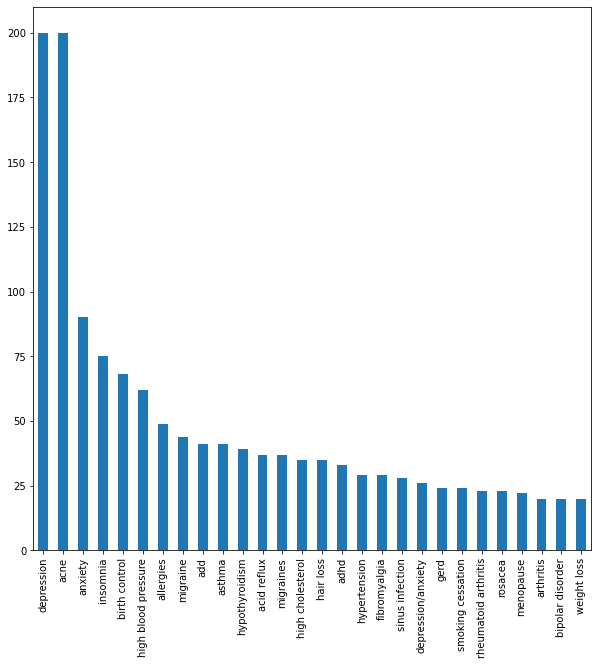

In [25]:
data_shorter.condition.value_counts().plot.bar()

In [26]:
print(data_shorter)

      Unnamed: 0 urlDrugName  rating           effectiveness  \
0           1366      biaxin       9  Considerably Effective   
1           3724    lamictal       9        Highly Effective   
2           3824    depakene       4    Moderately Effective   
3           1380      biaxin       2    Marginally Effective   
4           1962      lyrica       3    Moderately Effective   
...          ...         ...     ...                     ...   
1369        3572    differin       9  Considerably Effective   
1370        3809     solodyn       7        Highly Effective   
1371        1511     kenalog       2             Ineffective   
1372         556       doryx       1             Ineffective   
1373        3574    differin       8  Considerably Effective   

                sideEffects         condition  \
0         Mild Side Effects   sinus infection   
1         Mild Side Effects  bipolar disorder   
2       Severe Side Effects  bipolar disorder   
3           No Side Effects   sinus

In [27]:
data_shorter.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,1380,biaxin,2,Marginally Effective,No Side Effects,sinus infection,By the end of the 10-day treatment I felt bett...,I felt no significant side effects - perhaps s...,Basically the treatment did not seem to work. ...
4,1962,lyrica,3,Moderately Effective,Moderate Side Effects,fibromyalgia,some pain relief recieved minimized pain when ...,signigicant swelling of hands and feet so sign...,I started on 50mg twice aday with out any pain...


<a id="1"></a> <br>
<font size="+3" color="black"><b>4 - Pre-processing</b></font><br><a id="4"></a>
<br> 

In [28]:
from tqdm import tqdm
import nltk
import re
tqdm.pandas()
nltk.download('stopwords')
def preprocess(df):
    stopwords = nltk.corpus.stopwords.words('english')
    data_shorter['benefits_pre'] = data_shorter['benefitsReview']
    data_shorter['benefits_pre'] = data_shorter['benefits_pre'].progress_apply(lambda x : x.lower())
    data_shorter['benefits_pre'] = data_shorter['benefits_pre'].progress_apply(lambda x : x.split(" "))
    data_shorter['benefits_pre'] = data_shorter['benefits_pre'].progress_apply(lambda x : [item for item in x if item not in stopwords])
    data_shorter['benefits_pre'] = data_shorter['benefits_pre'].progress_apply(lambda x : " ".join(x))
    data_shorter['benefits_pre'] = data_shorter['benefits_pre'].str.replace('https?:\/\/.*[\r\n]*', '')
    data_shorter['benefits_pre'] = data_shorter['benefits_pre'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    data_shorter['benefits_pre'] = data_shorter['benefits_pre'].str.replace('\d+', '')
    data_shorter['benefits_pre'] = data_shorter['benefits_pre'].str.replace('[^\w\s]', '')
    data_shorter['sideEffects_pre'] = data_shorter['sideEffectsReview']
    data_shorter['sideEffects_pre'] = data_shorter['sideEffects_pre'].progress_apply(lambda x : x.lower())
    data_shorter['sideEffects_pre'] = data_shorter['sideEffects_pre'].progress_apply(lambda x : x.split(" "))
    data_shorter['sideEffects_pre'] = data_shorter['sideEffects_pre'].progress_apply(lambda x : [item for item in x if item not in stopwords])
    data_shorter['sideEffects_pre'] = data_shorter['sideEffects_pre'].progress_apply(lambda x : " ".join(x))
    data_shorter['sideEffects_pre'] = data_shorter['sideEffects_pre'].str.replace('https?:\/\/.*[\r\n]*', '')
    data_shorter['sideEffects_pre'] = data_shorter['sideEffects_pre'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    data_shorter['sideEffects_pre'] = data_shorter['sideEffects_pre'].str.replace('\d+', '')
    data_shorter['sideEffects_pre'] = data_shorter['sideEffects_pre'].str.replace('[^\w\s]', '')
    data_shorter['comments_pre'] = data_shorter['commentsReview']
    data_shorter['comments_pre'] = data_shorter['comments_pre'].progress_apply(lambda x : x.lower())
    data_shorter['comments_pre'] = data_shorter['comments_pre'].progress_apply(lambda x : x.split(" "))
    data_shorter['comments_pre'] = data_shorter['comments_pre'].progress_apply(lambda x : [item for item in x if item not in stopwords])
    data_shorter['comments_pre'] = data_shorter['comments_pre'].progress_apply(lambda x : " ".join(x))
    data_shorter['comments_pre'] = data_shorter['comments_pre'].str.replace('https?:\/\/.*[\r\n]*', '')
    data_shorter['comments_pre'] = data_shorter['comments_pre'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    data_shorter['comments_pre'] = data_shorter['comments_pre'].str.replace('\d+', '')
    data_shorter['comments_pre'] = data_shorter['comments_pre'].str.replace('[^\w\s]', '')   
    return df

data_shorter = preprocess(data_shorter)

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oorjakejriwal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 1374/1374 [00:00<00:00, 264283.85it/s]


In [29]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    porter = PorterStemmer()
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [30]:
data_shorter['comments_pre']=data_shorter['comments_pre'].apply(lambda x: stemSentence(x))
data_shorter['benefits_pre']=data_shorter['benefits_pre'].apply(lambda x: stemSentence(x))
data_shorter['sideEffects_pre']=data_shorter['sideEffects_pre'].apply(lambda x: stemSentence(x))

In [31]:
data_shorter.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,benefits_pre,sideEffects_pre,comments_pre
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,antibiot may destroy bacteria caus sinu infect...,back pain nauseau,took antibiot day sinu infect gone th day
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...,lamict stabil seriou mood swing one minut claw...,drowsi bit mental numb take much feel sedat si...,sever mood swing hypomania depress suicid idea...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,initi benefit compar brand name version drug d...,depaken thin coat caus sever heart burn stomac...,depakot prescrib kaiser psychiatrist pleasant ...
3,1380,biaxin,2,Marginally Effective,No Side Effects,sinus infection,By the end of the 10-day treatment I felt bett...,I felt no significant side effects - perhaps s...,Basically the treatment did not seem to work. ...,end day treatment felt better still major cong...,felt signific side effect perhap slight drowsi,basic treatment seem work presumpt symptom com...
4,1962,lyrica,3,Moderately Effective,Moderate Side Effects,fibromyalgia,some pain relief recieved minimized pain when ...,signigicant swelling of hands and feet so sign...,I started on 50mg twice aday with out any pain...,pain relief reciev minim pain touch,signigic swell hand feet signific uncomfort di...,start mg twice aday pain relief dosag increas ...


In [32]:
data_shorter['condition']=data_shorter['condition'].str.lower()
print(data_shorter['condition'])

0        sinus infection
1       bipolar disorder
2       bipolar disorder
3        sinus infection
4           fibromyalgia
              ...       
1369                acne
1370                acne
1371                acne
1372                acne
1373                acne
Name: condition, Length: 1374, dtype: object


In [33]:
data_shorter['combinedReview'] = data_shorter[['sideEffects_pre', 'benefits_pre', 'comments_pre']].agg(' '.join, axis=1)

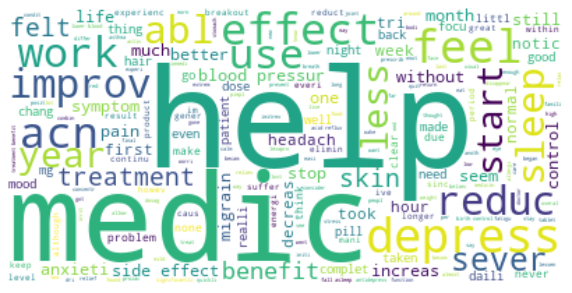

In [34]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(review for review in data_shorter.benefits_pre)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["medication","drug","take","taking","day","time","able"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#wordcloud.to_file("BenefitsReview.png")

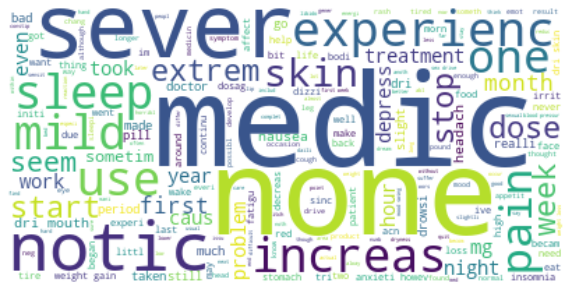

In [35]:
text = " ".join(review for review in data_shorter.sideEffects_pre)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["side","effect","effects","day","taking","drug","time","medication","take","feel","felt"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#wordcloud.to_file("SideEffectsReview.png")

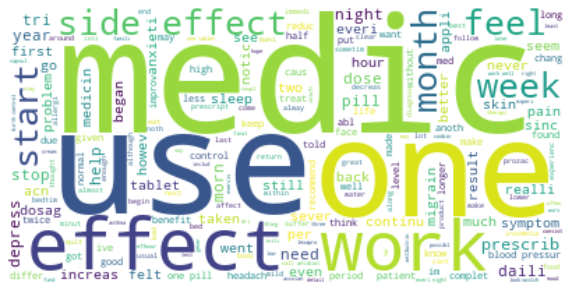

In [36]:
text = " ".join(review for review in data_shorter.comments_pre)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["day","take","drug","medication","time","taking","took","mg","doctor","treatment","prescribed"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#wordcloud.to_file("CommentsReview.png")

<font size="+3" color="black"><b>5 - Sentiment Analysis</b></font><br><a id="5"></a>

In [37]:
filepath = "NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], sep='\t', keep_default_na=False)
#Changing the default layout for easier processing
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


## (i) For the Benefits

In [38]:
#Only including words present in the lexicon
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(data_shorter.benefits_pre)
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
angry_words = emolex_df[emolex_df.anger == 1]['word']
anticipation_words = emolex_df[emolex_df.anticipation == 1]['word']
fear_words = emolex_df[emolex_df.fear == 1]['word']
sadness_words = emolex_df[emolex_df.sadness == 1]['word']
surprise_words = emolex_df[emolex_df.surprise == 1]['word']
trust_words = emolex_df[emolex_df.trust == 1]['word']
joy_words = emolex_df[emolex_df.joy == 1]['word']
disgust_words = emolex_df[emolex_df.disgust == 1]['word']
positive_words = emolex_df[emolex_df.positive == 1]['word']
negative_words = emolex_df[emolex_df.negative == 1]['word']

In [40]:
data1=data_shorter.copy()

In [41]:
data1['anger'] = wordcount_df[angry_words].sum(axis=1)
data1['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
data1['fear'] = wordcount_df[fear_words].sum(axis=1)
data1['sadness'] = wordcount_df[sadness_words].sum(axis=1)
data1['surprise'] = wordcount_df[surprise_words].sum(axis=1)
data1['trust'] = wordcount_df[trust_words].sum(axis=1)
data1['joy'] = wordcount_df[joy_words].sum(axis=1)
data1['disgust'] = wordcount_df[disgust_words].sum(axis=1)
data1['positive'] = wordcount_df[positive_words].sum(axis=1)
data1['negative'] = wordcount_df[negative_words].sum(axis=1)

In [42]:
sum_benefits = data1.select_dtypes(pd.np.number).sum().round()

<ipython-input-42-526b7fe2708b>:1: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [43]:
df_benefits= pd.DataFrame({'Emotion':sum_benefits.index, 'Total':sum_benefits.values})

In [44]:
df_benefits= df_benefits.iloc[2:]

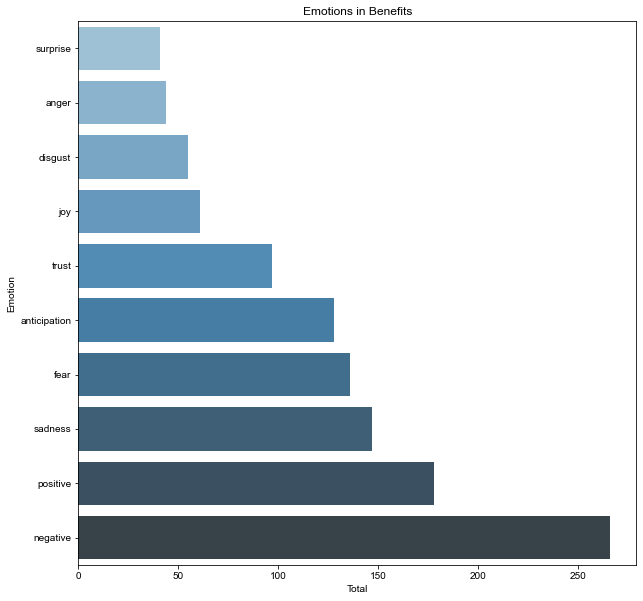

In [45]:
sns.barplot(x='Total', y='Emotion', data=df_benefits, palette="Blues_d", order=df_benefits.sort_values('Total').Emotion)
plt.title("Emotions in Benefits")
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

## (ii) For the Side effects

In [46]:
#Only including words present in the lexicon
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(data_shorter.sideEffects_pre)
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
angry_words = emolex_df[emolex_df.anger == 1]['word']
anticipation_words = emolex_df[emolex_df.anticipation == 1]['word']
fear_words = emolex_df[emolex_df.fear == 1]['word']
sadness_words = emolex_df[emolex_df.sadness == 1]['word']
surprise_words = emolex_df[emolex_df.surprise == 1]['word']
trust_words = emolex_df[emolex_df.trust == 1]['word']
joy_words = emolex_df[emolex_df.joy == 1]['word']
disgust_words = emolex_df[emolex_df.disgust == 1]['word']
positive_words = emolex_df[emolex_df.positive == 1]['word']
negative_words = emolex_df[emolex_df.negative == 1]['word']

In [48]:
data2=data_shorter.copy()

In [49]:
data2['anger'] = wordcount_df[angry_words].sum(axis=1)
data2['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
data2['fear'] = wordcount_df[fear_words].sum(axis=1)
data2['sadness'] = wordcount_df[sadness_words].sum(axis=1)
data2['surprise'] = wordcount_df[surprise_words].sum(axis=1)
data2['trust'] = wordcount_df[trust_words].sum(axis=1)
data2['joy'] = wordcount_df[joy_words].sum(axis=1)
data2['disgust'] = wordcount_df[disgust_words].sum(axis=1)
data2['positive'] = wordcount_df[positive_words].sum(axis=1)
data2['negative'] = wordcount_df[negative_words].sum(axis=1)

In [50]:
sum_sideEffects = data2.select_dtypes(pd.np.number).sum().round()

<ipython-input-50-6c63bdafb7d6>:1: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [51]:
df_sideEffects= pd.DataFrame({'Emotion':sum_sideEffects.index, 'Total':sum_sideEffects.values})

In [52]:
df_sideEffects= df_sideEffects.iloc[2:]

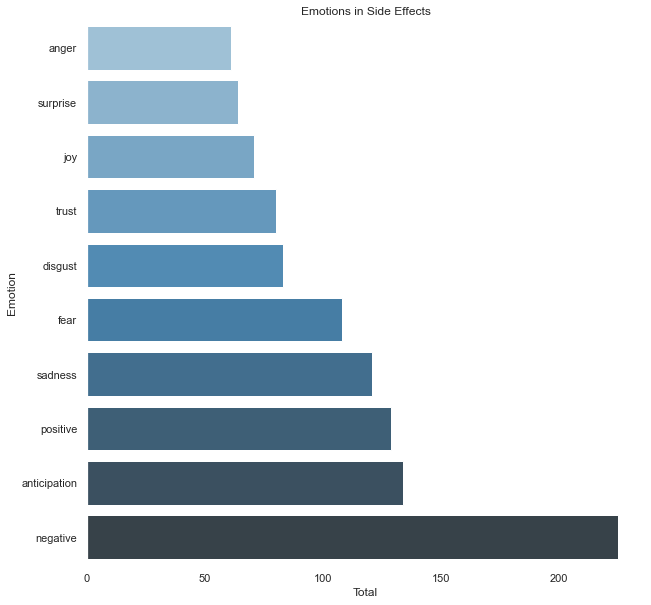

In [53]:
sns.barplot(x='Total', y='Emotion', data=df_sideEffects, palette="Blues_d", order=df_sideEffects.sort_values('Total').Emotion)
plt.title("Emotions in Side Effects")
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

## (iii) For the Comments

In [54]:
#Only including words present in the lexicon
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(data_shorter.comments_pre)
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
angry_words = emolex_df[emolex_df.anger == 1]['word']
anticipation_words = emolex_df[emolex_df.anticipation == 1]['word']
fear_words = emolex_df[emolex_df.fear == 1]['word']
sadness_words = emolex_df[emolex_df.sadness == 1]['word']
surprise_words = emolex_df[emolex_df.surprise == 1]['word']
trust_words = emolex_df[emolex_df.trust == 1]['word']
joy_words = emolex_df[emolex_df.joy == 1]['word']
disgust_words = emolex_df[emolex_df.disgust == 1]['word']
positive_words = emolex_df[emolex_df.positive == 1]['word']
negative_words = emolex_df[emolex_df.negative == 1]['word']

In [56]:
data3=data_shorter.copy()

In [57]:
data3['anger'] = wordcount_df[angry_words].sum(axis=1)
data3['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
data3['fear'] = wordcount_df[fear_words].sum(axis=1)
data3['sadness'] = wordcount_df[sadness_words].sum(axis=1)
data3['surprise'] = wordcount_df[surprise_words].sum(axis=1)
data3['trust'] = wordcount_df[trust_words].sum(axis=1)
data3['joy'] = wordcount_df[joy_words].sum(axis=1)
data3['disgust'] = wordcount_df[disgust_words].sum(axis=1)
data3['positive'] = wordcount_df[positive_words].sum(axis=1)
data3['negative'] = wordcount_df[negative_words].sum(axis=1)

In [58]:
sum_comments = data3.select_dtypes(pd.np.number).sum().round()

<ipython-input-58-ed0ee3ce0317>:1: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [59]:
df_comments= pd.DataFrame({'Emotion':sum_comments.index, 'Total':sum_comments.values})

In [60]:
df_comments= df_comments.iloc[2:]

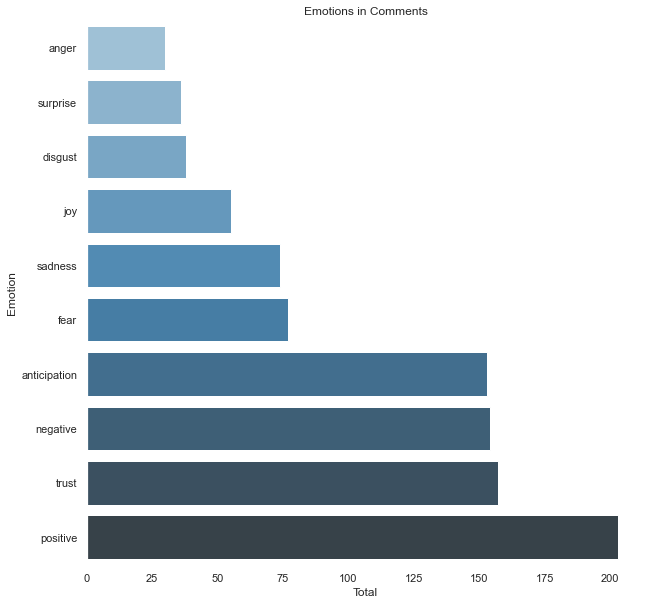

In [61]:
sns.barplot(x='Total', y='Emotion', data=df_comments, palette="Blues_d", order=df_comments.sort_values('Total').Emotion)
plt.title("Emotions in Comments")
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

<a id="6"></a> <br>
<font size="+3" color="black"><b>6 - Modelling</b></font><br><a id="6"></a>
<br> 

## Target Labelling -- Label Encoding 

In [62]:
from sklearn import preprocessing

data = data_shorter['condition']
le = preprocessing.LabelEncoder()

data_shorter['condition_label'] = le.fit_transform(data)

## Converting text data to numerical data

In [63]:
def extract_features(df,field,training_data,testing_data,type):
    from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
    # Extract features using different methods
    
    print("Extracting features and creating vocabulary...")
    
    if "binary" in type:
            
        # BINARY FEATURE REPRESENTATION
        cv= CountVectorizer(binary=True, max_df=0.95)
        cv.fit_transform(training_data[field].values)
            
        train_feature_set=cv.transform(training_data[field].values)
        test_feature_set=cv.transform(testing_data[field].values)
            
        return train_feature_set,test_feature_set,cv
    
    elif "counts" in type:
            
        # COUNT BASED FEATURE REPRESENTATION
        cv= CountVectorizer(binary=False, max_df=0.95)
        cv.fit_transform(training_data[field].values)
            
        train_feature_set=cv.transform(training_data[field].values)
        test_feature_set=cv.transform(testing_data[field].values)
            
        return train_feature_set,test_feature_set,cv
    
    elif "ngram" in type:
        
        # N-GRAM BASED FEATURE REPRESENTATION
        ngramcv = CountVectorizer(ngram_range=(1,2))
        ngramcv.fit_transform(training_data[field].values)
            
        train_feature_set=ngramcv.transform(training_data[field].values)
        test_feature_set=ngramcv.transform(testing_data[field].values)
            
        return train_feature_set,test_feature_set,ngramcv
        
    elif "tf-idf" in type:    
            
        # TF-IDF BASED FEATURE REPRESENTATION
        tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
        tfidf_vectorizer.fit_transform(training_data[field].values)
            
        train_feature_set=tfidf_vectorizer.transform(training_data[field].values)
        test_feature_set=tfidf_vectorizer.transform(testing_data[field].values)

## Getting Train and Test Datasets

In [64]:
data_shorter.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview',
       'benefits_pre', 'sideEffects_pre', 'comments_pre', 'combinedReview',
       'condition_label'],
      dtype='object')

In [65]:
df = data_shorter.drop(columns=['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview',
       'benefits_pre', 'sideEffects_pre', 'comments_pre'])

# GET A TRAIN TEST SPLIT (set seed for consistent results)
training_data, testing_data = train_test_split(df, test_size=0.2,random_state = 42)

# GET LABELS
Y_train=training_data['condition_label'].values
Y_test=testing_data['condition_label'].values
     
# GET FEATURES
X_train,X_test,feature_transformer=extract_features(df,'combinedReview',training_data,testing_data,type='ngram')

Extracting features and creating vocabulary...


In [124]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import learning_curve,GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support


from sklearn.datasets import fetch_covtype
import scipy

## 1. Naive Bayes Classifier

In [78]:
#initial testing of NB model
clf_nb = MultinomialNB()  
Y_nb_pred = clf_nb.fit(X_train.toarray(), Y_train).predict(X_test.toarray())

print("\nClassification Report of Naive Bayes Classifier:\n")
print(classification_report(Y_test, Y_nb_pred))
print("Accuracy of Naive Bayes Classifier: {}%".format(round(accuracy_score(Y_test, Y_nb_pred)*100,5)))


Classification Report of Naive Bayes Classifier:

              precision    recall  f1-score   support

           0       0.50      0.10      0.17        10
           1       0.67      0.98      0.79        43
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       1.00      0.22      0.36         9
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00         5
           7       1.00      0.15      0.27        13
           8       0.00      0.00      0.00         3
           9       1.00      0.29      0.45        17
          10       0.19      1.00      0.31        35
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         8
          14       1.00      0.14      0.25         7
          15       0.33      0.14      0.20         7
          16       0.00      0

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [79]:
 #using gridsearchcv to find best parameters
params = {'model__alpha':[0,1],
          'model__fit_prior':[True,False]
         }
pipe = Pipeline([
    ("resample", SMOTE(random_state=515)),
    ("model", MultinomialNB())
])
gsv_mNB_sm = GridSearchCV(estimator=pipe,
                       param_grid=params,
                       cv=3, verbose=2, n_jobs=-1, scoring="f1_macro")
gsv_mNB_sm.fit(X_train, Y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('resample', SMOTE(random_state=515)),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0, 1],
                         'model__fit_prior': [True, False]},
             scoring='f1_macro', verbose=2)

In [80]:
gsv_mNB_sm.best_params_

{'model__alpha': 0, 'model__fit_prior': True}

In [81]:
#testing with new parameters
new_clf_nb = Pipeline([
    ("resample", SMOTE(random_state=515)),
    ("model", MultinomialNB(alpha= 1, fit_prior= True))
])
new_clf_nb.fit(X_train,Y_train)

Y_new_nb_pred = new_clf_nb.predict(X_test)

print("\nClassification Report of Naive Bayes Model :\n")
print(classification_report(Y_test, Y_new_nb_pred))
print("Accuracy of Naive Bayes Model: {}%".format(round(accuracy_score(Y_test, Y_new_nb_pred)*100,5)))


Classification Report of Naive Bayes Model :

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.71      0.98      0.82        43
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         5
           4       0.60      0.33      0.43         9
           5       1.00      0.05      0.10        19
           6       1.00      0.20      0.33         5
           7       0.89      0.62      0.73        13
           8       0.00      0.00      0.00         3
           9       1.00      0.59      0.74        17
          10       0.23      1.00      0.37        35
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         8
          14       1.00      0.43      0.60         7
          15       0.50      0.29      0.36         7
          16       1.00      0.17 

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [102]:
scores = cross_val_score(new_clf_nb, X_train, Y_train, cv=5, scoring='f1_macro')
print('Cross-Validation Accuracy Scores', scores)
print('Average F1 macro scores:', sum(scores)/len(scores))

Cross-Validation Accuracy Scores [0.40606257 0.3508053  0.42378447 0.3835144  0.45215477]
Average F1 macro scores: 0.403264304341723


In [100]:
scores = cross_val_score(new_clf_nb, X_train, Y_train, cv=5, scoring='f1_weighted')
print('Cross-Validation f1 Scores', scores)
print('Average F1 weighted scores:', sum(scores)/len(scores))

Cross-Validation f1 Scores [0.51132248 0.47119498 0.5131403  0.48632329 0.57274272]
Average F1 macro scores: 0.5109447537229437


In [101]:
scores = cross_val_score(new_clf_nb, X_train, Y_train, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores)
print('Average F1 weighted scores:', sum(scores)/len(scores))

Cross-Validation Accuracy Scores [0.54545455 0.51818182 0.55       0.53636364 0.60730594]
Average F1 weighted scores: 0.5514611872146118


## 2. Support Vector Machine (SVM)

In [70]:
clf_svm = svm.SVC(kernel="linear")
clf_svm.fit(X_train, Y_train)
Y_svm_pred = clf_svm.predict(X_test)

print("\nClassification Report of SVM:\n")
print(classification_report(Y_test, Y_svm_pred))
print("Accuracy of SVM: {}%".format(round(accuracy_score(Y_test, Y_svm_pred)*100,5)))


Classification Report of SVM:

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.75      1.00      0.86        43
           2       0.50      0.33      0.40         6
           3       1.00      0.20      0.33         5
           4       0.50      0.44      0.47         9
           5       0.73      0.58      0.65        19
           6       1.00      0.40      0.57         5
           7       1.00      0.46      0.63        13
           8       1.00      0.33      0.50         3
           9       1.00      0.71      0.83        17
          10       0.36      0.94      0.52        35
          11       0.33      0.11      0.17         9
          12       1.00      0.12      0.22         8
          13       0.43      0.38      0.40         8
          14       1.00      0.57      0.73         7
          15       0.67      0.57      0.62         7
          16       1.00      0.33      0.50      

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [71]:
scores = cross_val_score(clf_svm, X_train, Y_train, cv=5, scoring='f1_macro')
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.56746562 0.48742881 0.49575435 0.53923599 0.45789717]


In [72]:
from sklearn.linear_model import SGDClassifier
clf_sgd_svm = SGDClassifier(loss="hinge", alpha=0.001, random_state=515)
clf_sgd_svm.fit(X_train, Y_train)
Y_sgd_svm_pred = clf_sgd_svm.predict(X_test)

print("\nClassification Report of SVM with SGD:\n")
print(classification_report(Y_test, Y_sgd_svm_pred))
print("Accuracy of SVM with SGD: {}%".format(round(accuracy_score(Y_test, Y_sgd_svm_pred)*100,5)))


Classification Report of SVM with SGD:

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.76      0.98      0.86        43
           2       0.50      0.17      0.25         6
           3       1.00      0.20      0.33         5
           4       0.75      0.67      0.71         9
           5       0.75      0.79      0.77        19
           6       0.75      0.60      0.67         5
           7       0.83      0.77      0.80        13
           8       0.33      0.33      0.33         3
           9       1.00      0.82      0.90        17
          10       0.52      0.89      0.65        35
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         8
          13       1.00      0.25      0.40         8
          14       0.78      1.00      0.88         7
          15       0.43      0.43      0.43         7
          16       0.67      0.67      0

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [73]:
scores = cross_val_score(clf_sgd_svm, X_train, Y_train, cv=5, scoring='f1_macro')
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.53927386 0.54154374 0.55209142 0.53854589 0.58413547]


## 2. Support Vector Machine (SVM)

### 2.1 Full GD

In [89]:
clf_svm = svm.SVC(kernel="linear")
clf_svm.fit(X_train, Y_train)
Y_svm_pred = clf_svm.predict(X_test)

print("\nClassification Report of SVM:\n")
print(classification_report(Y_test, Y_svm_pred))
print("Accuracy of SVM: {}%".format(round(accuracy_score(Y_test, Y_svm_pred)*100,5)))


Classification Report of SVM:

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.71      0.95      0.81        43
           2       0.67      0.33      0.44         6
           3       0.50      0.20      0.29         5
           4       0.57      0.44      0.50         9
           5       0.68      0.68      0.68        19
           6       1.00      0.40      0.57         5
           7       1.00      0.46      0.63        13
           8       0.00      0.00      0.00         3
           9       1.00      0.65      0.79        17
          10       0.35      0.94      0.52        35
          11       1.00      0.11      0.20         9
          12       1.00      0.25      0.40         8
          13       0.43      0.38      0.40         8
          14       1.00      0.57      0.73         7
          15       0.67      0.57      0.62         7
          16       1.00      0.33      0.50      

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [90]:
scores = cross_val_score(clf_svm, X_train, Y_train, cv=5, scoring='f1_macro')
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.54590177 0.49276737 0.48351033 0.52987229 0.46890953]


### 2.2 SGD and GridSearch

In [91]:
gsv_svm = GridSearchCV(estimator=SGDClassifier(random_state=515),
                       param_grid={"loss": ["hinge", "squared_hinge"],
                                   "alpha": np.linspace(0.0005, 0.05)},
                       cv=3, verbose=2, n_jobs=-1, scoring="f1_macro")
gsv_svm.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=SGDClassifier(random_state=515), n_jobs=-1,
             param_grid={'alpha': array([0.0005    , 0.0015102 , 0.00252041, 0.00353061, 0.00454082,
       0.00555102, 0.00656122, 0.00757143, 0.00858163, 0.00959184,
       0.01060204, 0.01161224, 0.01262245, 0.01363265, 0.01464286,
       0.01565306, 0.01666327, 0.01767347, 0.01868367, 0.01969388,
       0.02070408, 0.02171429, 0.02272449, 0.02373469, 0.0247449 ,
       0.0257551 , 0.02676531, 0.02777551, 0.02878571, 0.02979592,
       0.03080612, 0.03181633, 0.03282653, 0.03383673, 0.03484694,
       0.03585714, 0.03686735, 0.03787755, 0.03888776, 0.03989796,
       0.04090816, 0.04191837, 0.04292857, 0.04393878, 0.04494898,
       0.04595918, 0.04696939, 0.04797959, 0.0489898 , 0.05      ]),
                         'loss': ['hinge', 'squared_hinge']},
             scoring='f1_macro', verbose=2)

In [92]:
gsv_svm.best_params_

{'alpha': 0.009591836734693878, 'loss': 'hinge'}

In [93]:
clf_svm_sgd = SGDClassifier(loss="hinge", alpha=0.0479796, random_state=515)
clf_svm_sgd.fit(X_train, Y_train)
Y_svm_sgd_pred = clf_svm_sgd.predict(X_test)

print("\nClassification Report of SVM with SGD:\n")
print(classification_report(Y_test, Y_svm_sgd_pred))
print("Accuracy of SVM with SGD: {}%".format(round(accuracy_score(Y_test, Y_svm_sgd_pred)*100,5)))


Classification Report of SVM with SGD:

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.86      0.98      0.91        43
           2       0.67      0.33      0.44         6
           3       1.00      0.40      0.57         5
           4       0.75      0.67      0.71         9
           5       0.60      0.79      0.68        19
           6       1.00      0.20      0.33         5
           7       0.90      0.69      0.78        13
           8       0.50      0.33      0.40         3
           9       0.87      0.76      0.81        17
          10       0.43      0.91      0.59        35
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         8
          13       1.00      0.38      0.55         8
          14       0.86      0.86      0.86         7
          15       0.38      0.43      0.40         7
          16       1.00      0.50      0

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [94]:
scores = cross_val_score(clf_svm_sgd, X_train, Y_train, cv=5, scoring='f1_macro')
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.59156814 0.54375855 0.58076091 0.60455084 0.56663666]


### 2.3 Oversampling

In [95]:
pipe = Pipeline([
    ("resample", SMOTE(random_state=515)),
    ("model", SGDClassifier(random_state=515))
])
gsv_svm_sm = GridSearchCV(estimator=pipe,
                       param_grid={"model__loss": ["hinge", "squared_hinge"],
                                   "model__alpha": np.linspace(0.0005, 0.05)},
                       cv=3, verbose=2, n_jobs=-1, scoring="f1_macro")
gsv_svm_sm.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('resample', SMOTE(random_state=515)),
                                       ('model',
                                        SGDClassifier(random_state=515))]),
             n_jobs=-1,
             param_grid={'model__alpha': array([0.0005    , 0.0015102 , 0.00252041, 0.00353061, 0.00454082,
       0.00555102, 0.00656122, 0.00757143, 0.00858163, 0.00959184,
       0.01060204, 0.01161224, 0.01262245, 0.01363265, 0.01464286,
       0.01565306, 0.01666327...
       0.02070408, 0.02171429, 0.02272449, 0.02373469, 0.0247449 ,
       0.0257551 , 0.02676531, 0.02777551, 0.02878571, 0.02979592,
       0.03080612, 0.03181633, 0.03282653, 0.03383673, 0.03484694,
       0.03585714, 0.03686735, 0.03787755, 0.03888776, 0.03989796,
       0.04090816, 0.04191837, 0.04292857, 0.04393878, 0.04494898,
       0.04595918, 0.04696939, 0.04797959, 0.0489898 , 0.05      ]),
                         'model__loss': ['hinge', 'squared_hinge']},
      

In [96]:
gsv_svm_sm.best_params_

{'model__alpha': 0.04090816326530612, 'model__loss': 'hinge'}

In [97]:
clf_svm_sm = Pipeline([
    ("resample", SMOTE(random_state=515)),
    ("model", SGDClassifier(loss="hinge", alpha=0.0217143, random_state=515))
])
clf_svm_sm.fit(X_train, Y_train)
Y_svm_sm_pred = clf_svm_sm.predict(X_test)

print("\nClassification Report of SVM with SGD and oversampling:\n")
print(classification_report(Y_test, Y_svm_sm_pred))
print("Accuracy of SVM with SGD and oversampling: {}%".format(round(accuracy_score(Y_test, Y_svm_sm_pred)*100,5)))


Classification Report of SVM with SGD and oversampling:

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.89      0.95      0.92        43
           2       0.67      0.33      0.44         6
           3       1.00      0.40      0.57         5
           4       0.71      0.56      0.63         9
           5       0.68      0.68      0.68        19
           6       0.50      0.60      0.55         5
           7       0.83      0.77      0.80        13
           8       0.67      0.67      0.67         3
           9       0.81      0.76      0.79        17
          10       0.41      0.77      0.53        35
          11       0.00      0.00      0.00         9
          12       0.67      0.25      0.36         8
          13       0.75      0.75      0.75         8
          14       0.88      1.00      0.93         7
          15       0.40      0.29      0.33         7
          16       0.75

In [104]:
scores = cross_val_score(clf_svm_sm, X_train, Y_train, cv=5, scoring='f1_macro')
print('Cross-Validation f1 Scores', scores)
print('Average F1 macro scores:', sum(scores)/len(scores))

Cross-Validation f1 Scores [0.56785941 0.59732217 0.60854797 0.62197947 0.62196303]
Average F1 weighted scores: 0.6035344092923487


In [98]:
scores = cross_val_score(clf_svm_sm, X_train, Y_train, cv=5, scoring='f1_weighted')
print('Cross-Validation f1 Scores', scores)
print('Average F1 weighted scores:', sum(scores)/len(scores))

Cross-Validation f1 Scores [0.64655041 0.65535544 0.67565427 0.67921829 0.67920823]
Average F1 weighted scores: 0.6671973293872002


In [99]:
scores = cross_val_score(clf_svm_sm, X_train, Y_train, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores)
print('Average F1 weighted scores:', sum(scores)/len(scores))

Cross-Validation Accuracy Scores [0.66363636 0.65909091 0.68181818 0.69545455 0.6803653 ]
Average F1 weighted scores: 0.6760730593607305


## 3. Logistic Regression Model

In [107]:
sm = SMOTE(random_state = 42)
X_train_sm, Y_train_sm = sm.fit_resample(X_train, Y_train)

#### 3.1 GridSearch to find best parameters

In [108]:
params = {'C':[0.25,0.5,0.75],
          'class_weight':[None,'balanced'],
          'solver':['newton-cg','sag','saga','lbfgs']
         }


In [109]:
gsv_log = GridSearchCV(estimator=LogisticRegression(),param_grid=params,
                       cv=3,verbose=2,n_jobs=-1, scoring='f1_macro')

In [110]:
gsv_log.fit(X_train, Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.25, 0.5, 0.75],
                         'class_weight': [None, 'balanced'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             scoring='f1_macro', verbose=2)

In [112]:
gsv_log.best_params_

{'C': 0.5, 'class_weight': 'balanced', 'solver': 'saga'}

#### 3.2 Logistic Regression using Oversampled Training Dataset

In [113]:
clf_log = LogisticRegression(C=0.25, solver='saga', multi_class='multinomial', class_weight='balanced', max_iter=1000)
model=clf_log.fit(X_train_sm,Y_train_sm)

Y_log_pred = clf_log.predict(X_test)

print("\nClassification Report of Logistic Regression Model:\n")
print(classification_report(Y_test, Y_log_pred))
print("Accuracy of Logistic Regression Model: {}%".format(round(accuracy_score(Y_test, Y_log_pred)*100,5)))


Classification Report of Logistic Regression Model:

              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.93      0.91      0.92        43
           2       0.25      0.50      0.33         6
           3       0.11      0.20      0.14         5
           4       0.44      0.44      0.44         9
           5       0.75      0.63      0.69        19
           6       0.43      0.60      0.50         5
           7       0.90      0.69      0.78        13
           8       0.33      0.67      0.44         3
           9       0.87      0.76      0.81        17
          10       0.59      0.57      0.58        35
          11       0.12      0.11      0.12         9
          12       0.50      0.25      0.33         8
          13       0.50      0.62      0.56         8
          14       0.78      1.00      0.88         7
          15       0.60      0.43      0.50         7
          16       1.00    

### 3.3 Logistic Regression SGD and Oversampling

In [115]:
pipe = Pipeline([
    ("resample", SMOTE(random_state=515)),
    ("model", SGDClassifier(random_state=515))
])
gsv_log_sm = GridSearchCV(estimator=pipe,
                       param_grid={'model__alpha': np.linspace(0.0005, 0.05), 
                                    'model__loss': ['log'], # logistic regression,
                                    'model__penalty': ['l2'],
                                    'model__n_jobs': [-1]},
                       cv=3, verbose=2, n_jobs=-1, scoring="f1_macro")
gsv_log_sm.fit(X_train, Y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('resample', SMOTE(random_state=515)),
                                       ('model',
                                        SGDClassifier(random_state=515))]),
             n_jobs=-1,
             param_grid={'model__alpha': array([0.0005    , 0.0015102 , 0.00252041, 0.00353061, 0.00454082,
       0.00555102, 0.00656122, 0.00757143, 0.00858163, 0.00959184,
       0.01060204, 0.01161224, 0.01262245, 0.01363265, 0.01464286,
       0.01565306, 0.01666327...
       0.0257551 , 0.02676531, 0.02777551, 0.02878571, 0.02979592,
       0.03080612, 0.03181633, 0.03282653, 0.03383673, 0.03484694,
       0.03585714, 0.03686735, 0.03787755, 0.03888776, 0.03989796,
       0.04090816, 0.04191837, 0.04292857, 0.04393878, 0.04494898,
       0.04595918, 0.04696939, 0.04797959, 0.0489898 , 0.05      ]),
                         'model__loss': ['log'], 'model__n_jobs': [-1],
                         'model__penalty': ['l2']},
             scori

In [116]:
gsv_log_sm.best_params_

{'model__alpha': 0.006561224489795918,
 'model__loss': 'log',
 'model__n_jobs': -1,
 'model__penalty': 'l2'}

In [117]:
clf_log_sm = Pipeline([
    ("resample", SMOTE(random_state=515)),
    ("model", SGDClassifier(loss="log", alpha=0.006561224489795918, penalty='l2', random_state=515))
])
clf_log_sm.fit(X_train, Y_train)
Y_log_sm_pred = clf_log_sm.predict(X_test)

print("\nClassification Report of Logistic Regression with SGD and oversampling:\n")
print(classification_report(Y_test, Y_log_sm_pred))
print("Accuracy of Logistic Regression with SGD and oversampling: {}%".format(round(accuracy_score(Y_test, Y_log_sm_pred)*100,5)))


Classification Report of Logistic Regression with SGD and oversampling:

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.89      0.93      0.91        43
           2       0.50      0.33      0.40         6
           3       0.67      0.40      0.50         5
           4       0.71      0.56      0.63         9
           5       0.76      0.68      0.72        19
           6       0.40      0.40      0.40         5
           7       0.82      0.69      0.75        13
           8       0.50      0.33      0.40         3
           9       0.87      0.76      0.81        17
          10       0.37      0.80      0.50        35
          11       0.00      0.00      0.00         9
          12       0.50      0.25      0.33         8
          13       0.57      0.50      0.53         8
          14       0.88      1.00      0.93         7
          15       0.40      0.29      0.33         7
       

In [118]:
scores = cross_val_score(clf_log_sm, X_train, Y_train, cv=5, scoring='f1_macro')
print('Cross-Validation f1 Scores', scores)
print('Average f1 macro scores:', sum(scores)/len(scores))

Cross-Validation Accuracy Scores [0.56947699 0.56532803 0.57085454 0.58436582 0.59834916]
Average F1 macro scores: 0.5776749056981473


In [119]:
scores = cross_val_score(clf_log_sm, X_train, Y_train, cv=5, scoring='f1_weighted')
print('Cross-Validation f1 Scores', scores)
print('Average f1 weighted scores:', sum(scores)/len(scores))

Cross-Validation f1 Scores [0.65193853 0.63136217 0.66529737 0.65566926 0.66748145]
Average f1 weighted scores: 0.6543497557810607


In [120]:
scores = cross_val_score(clf_log_sm, X_train, Y_train, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores)
print('Average Accuracy scores:', sum(scores)/len(scores))

Cross-Validation Accuracy Scores [0.67272727 0.64090909 0.67727273 0.68181818 0.67123288]
Average Accuracy scores: 0.6687920298879202


## 4. Random Forest

In [125]:
n_estimators=[50, 90, 100, 300]
max_features=['sqrt', 'log2','auto']
max_depth=[ 50,100,150]
min_samples_leaf=[1,2]
min_samples_split=[2,5]
bootstrap =['True','False']

In [126]:
params = {'n_estimators':n_estimators,
          'max_features':max_features,
          'max_depth':max_depth,
          'min_samples_leaf':min_samples_leaf,
          'min_samples_split':min_samples_split,
          'bootstrap': bootstrap}


In [127]:
gsv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params, cv=3,verbose=2,
                    n_jobs=-1, scoring='roc_auc')

In [128]:
gsv.fit(X_train, Y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/oorjakejriwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan 

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': ['True', 'False'],
                         'max_depth': [50, 100, 150],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 90, 100, 300]},
             scoring='roc_auc', verbose=2)

In [129]:
gsv.best_params_

{'bootstrap': 'True',
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [130]:
rf_model=RandomForestClassifier(n_estimators=50,
          max_features='sqrt',
          max_depth=50,
          min_samples_leaf=1,
          min_samples_split=2,
          bootstrap=True)

In [131]:
sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, Y_train)

In [132]:
rf_model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=50, max_features='sqrt', n_estimators=50)

In [133]:
Y_rf_pred = rf_model.predict(X_test)

print("\nClassification Report of Random Forest Model:\n")
print(classification_report(Y_test, Y_rf_pred))
print("Accuracy of Random Forest Model: {}%".format(round(accuracy_score(Y_test, Y_rf_pred)*100,5)))


Classification Report of Random Forest Model:

              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.91      0.93      0.92        43
           2       0.20      0.17      0.18         6
           3       0.23      0.60      0.33         5
           4       0.86      0.67      0.75         9
           5       0.80      0.42      0.55        19
           6       0.60      0.60      0.60         5
           7       0.85      0.85      0.85        13
           8       0.33      0.67      0.44         3
           9       0.64      0.82      0.72        17
          10       0.41      0.26      0.32        35
          11       0.00      0.00      0.00         9
          12       0.43      0.38      0.40         8
          13       0.56      0.62      0.59         8
          14       0.75      0.86      0.80         7
          15       0.57      0.57      0.57         7
          16       0.50      0.50

#### 4.1 Random Forest with Oversampling and GridSearchCV

In [134]:
pipe_rf = Pipeline([
    ("resample", SMOTE(random_state=515)),
    ("modelrf", RandomForestClassifier(random_state=515))
])
gsv_rf = GridSearchCV(estimator=pipe_rf,
                       param_grid={'modelrf__n_estimators':n_estimators,
          'modelrf__max_features':max_features,
          'modelrf__max_depth':max_depth,
          'modelrf__min_samples_leaf':min_samples_leaf,
          'modelrf__min_samples_split':min_samples_split,
          'modelrf__bootstrap': bootstrap},
                       cv=3, verbose=2, n_jobs=-1, scoring="f1_macro")
gsv_rf.fit(X_train, Y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('resample', SMOTE(random_state=515)),
                                       ('modelrf',
                                        RandomForestClassifier(random_state=515))]),
             n_jobs=-1,
             param_grid={'modelrf__bootstrap': ['True', 'False'],
                         'modelrf__max_depth': [50, 100, 150],
                         'modelrf__max_features': ['sqrt', 'log2', 'auto'],
                         'modelrf__min_samples_leaf': [1, 2],
                         'modelrf__min_samples_split': [2, 5],
                         'modelrf__n_estimators': [50, 90, 100, 300]},
             scoring='f1_macro', verbose=2)

In [135]:
gsv_rf.best_params_

{'modelrf__bootstrap': 'True',
 'modelrf__max_depth': 100,
 'modelrf__max_features': 'sqrt',
 'modelrf__min_samples_leaf': 2,
 'modelrf__min_samples_split': 2,
 'modelrf__n_estimators': 300}

In [136]:
clf_rf_sm = Pipeline([
    ("resample", SMOTE(random_state=515)),
    ("modelrf", RandomForestClassifier(n_estimators=300,
          max_features='sqrt',
          max_depth=50,
          min_samples_leaf=1,
          min_samples_split=5,
          bootstrap=True))
])
clf_rf_sm.fit(X_train, Y_train)
Y_rf_sm_pred = clf_rf_sm.predict(X_test)

print("\nClassification Report of Random Forest with oversampling:\n")
print(classification_report(Y_test, Y_rf_sm_pred))
print("Accuracy of Random Forest with oversampling: {}%".format(round(accuracy_score(Y_test, Y_rf_sm_pred)*100,5)))


Classification Report of Random Forest with oversampling:

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.89      0.93      0.91        43
           2       0.50      0.50      0.50         6
           3       0.60      0.60      0.60         5
           4       0.80      0.44      0.57         9
           5       0.64      0.47      0.55        19
           6       0.75      0.60      0.67         5
           7       0.85      0.85      0.85        13
           8       0.38      1.00      0.55         3
           9       0.71      0.88      0.79        17
          10       0.54      0.43      0.48        35
          11       0.00      0.00      0.00         9
          12       0.83      0.62      0.71         8
          13       0.64      0.88      0.74         8
          14       0.64      1.00      0.78         7
          15       0.43      0.43      0.43         7
          16       0.

In [137]:
scores = cross_val_score(clf_rf_sm, X_train, Y_train, cv=5, scoring='f1_macro')
print('Cross-Validation f1 Scores', scores)
print('Average f1 macro scores:', sum(scores)/len(scores))

Cross-Validation f1 Scores [0.600255   0.57778678 0.66032751 0.63490147 0.6896315 ]
Average f1 macro scores: 0.6325804539874439


In [138]:
scores = cross_val_score(clf_rf_sm, X_train, Y_train, cv=5, scoring='f1_weighted')
print('Cross-Validation f1 Scores', scores)
print('Average f1 weighted scores:', sum(scores)/len(scores))

Cross-Validation f1 Scores [0.6561806  0.71648373 0.69630017 0.70855286 0.69922281]
Average f1 weighted scores: 0.695348033647614


In [139]:
scores = cross_val_score(clf_rf_sm, X_train, Y_train, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores)
print('Average Accuracy scores:', sum(scores)/len(scores))

Cross-Validation Accuracy Scores [0.63636364 0.70454545 0.7        0.68636364 0.7260274 ]
Average Accuracy scores: 0.6906600249066003


## 5. XGBoost

In [ ]:
from scipy.sparse import issparse
scipy.sparse.issparse(X_test)

In [ ]:
pipe = Pipeline([
    ("resample", SMOTE(random_state=515)),
    ("model",xgb.XGBClassifier(objective='multi:softmax', num_class=28, seed=42, verbosity=2, 
                                random_state= 13, gamma=0.1))
])
gsv_xgb_sm = GridSearchCV(estimator=pipe,
                       param_grid={'model__learning_rate':[0.05, 0.1, 0.3],
                                  'model__max_depth':[25, 40, 50]},
                       cv=4, verbose=2, n_jobs=-1, scoring="f1_macro")
gsv_xgb_sm.fit(X_train, Y_train)

In [ ]:
gsv_xgb_sm.best_params_

In [ ]:
gsv_xgb_sm_refit = Pipeline([
    ("resample", SMOTE(random_state=515)),
    ("model", xgb.XGBClassifier(objective='multi:softmax', num_class=28, seed=42, verbosity=2, 
                                random_state= 13, gamma=0.1, learning_rate=0.3, max_depth=40))
])

In [ ]:
print("\nClassification Report of XGBoost with oversampling:\n")
print(classification_report(Y_test, Y_xgb_sm_pred))
print("Accuracy of XGBoost with oversampling: {}%".format(round(accuracy_score(Y_test, Y_xgb_sm_pred)*100,5)))

In [ ]:
scores = cross_val_score(gsv_xgb_sm_refit, X_train, Y_train, cv=5, scoring='f1_macro')
print('XGBoost Oversampling \n\nCross-Validation F1 Macro Scores:', *(scores*100))
print('Average F1 Macro score after Cross-Validation:', scores.mean()*100)

In [ ]:
scores = cross_val_score(gsv_xgb_sm_refit, X_train, Y_train, cv=5, scoring='accuracy')
print('XGBoost Oversampling \n\nCross-Validation Average Accuracy Scores:', *(scores*100))
print('Average Accuracy score after Cross-Validation:', scores.mean()*100)

In [ ]:
scores = cross_val_score(gsv_xgb_sm_refit, X_train, Y_train, cv=5, scoring='f1_weighted')
print('XGBoost Oversampling \n\nCross-Validation Average Accuracy Scores:', *(scores*100))
print('Average F1 weighted score after Cross-Validation:', scores.mean()*100)

<a id="7"></a> <br>
<font size="+3" color="black"><b>7 - Conclusion</b></font><br><a id="1"></a>
<br> 

*  After trying out various models with GridSearchCV and oversampling/undersampling, the models with high accuracy scores turn out to be Random Forest as well as XGBoost!
